In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sheet_id = "1rFyU55Pu7nm9BZItX_qy-XF-gSfeSRgzejEchmZHnV4"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv"

df = pd.read_csv(url)
df.head(3)


,Employee ID,Income,Gender,Department,Team
0,1,46000,F,Finance,A
1,2,39000,M,Finance,B
2,3,41000,M,Software,A


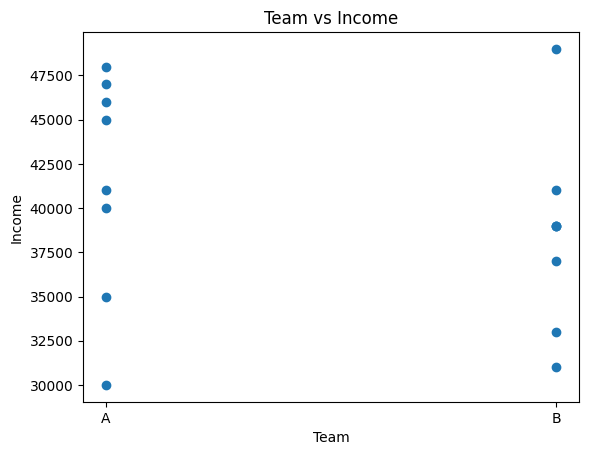

In [8]:
plt.figure()
plt.scatter(df["Team"],df["Income"])
plt.xlabel("Team")
plt.ylabel("Income")
plt.title("Team vs Income")
plt.show()

In [14]:
df.groupby(["Department", "Team"]).size().unstack()

Team,A,B
Department,,
Finance,1,4
HR,4,2
Software,3,2


In [15]:
df["Department"].value_counts()

,count
Department,
HR,6
Finance,5
Software,5


In [16]:
df.groupby(["Gender", "Team"]).size().unstack()


Team,A,B
Gender,,
F,4.0,NaN
M,4.0,8.0


In [26]:
#From All our observations we can make a single decision tree that uses:-

# Uses Gender as root and returns A when gender is female because team B has no females.

# Uses Income as secondary and returns B if income is less than 40K

# Uses Finance department only when necessary

In [43]:
def predict_team(income, gender, department):
    if gender == "F":
        return "A"

    # Male
    if income < 40000:
        return "B"

    if department == "Finance":
        return "B"

    return "A"


In [44]:
df["Predicted_Team"] = df.apply(
    lambda r: predict_team(r["Income"], r["Gender"], r["Department"]),
    axis=1
)
df[["Team", "Predicted_Team"]]


,Team,Predicted_Team
0,A,A
1,B,B
2,A,A
3,B,B
4,A,A
5,B,B
6,B,B
7,A,A
8,B,B
9,B,B


In [45]:
(df["Team"] == df["Predicted_Team"]).mean()*100
#This gives the accuracy of our code

np.float64(100.0)